In [159]:
### import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## [Link to dataset](https://www.google.com/url?q=https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data/data&sa=D&source=docs&ust=1730502587695059&usg=AOvVaw3kMqZe-yQhr2LT-L_PQyeM)

### Some data preparation steps were done in `setup.ipynb`

In [160]:
#load dataset
df = pd.read_csv('ethereum_data.csv')
df

,Open time,Open,High,Low,Volume,Close
0,2023-01-01 00:00:00,1196.13,1196.69,1194.90,1082.447100,1196.13
1,2023-01-01 00:10:00,1195.38,1195.98,1194.31,911.956300,1195.42
2,2023-01-01 00:20:00,1195.98,1196.70,1195.97,555.142200,1196.04
3,2023-01-01 00:30:00,1196.62,1196.62,1192.72,1858.116200,1196.27
4,2023-01-01 00:40:00,1194.22,1195.06,1193.02,962.942700,1193.97
...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,2283.34,2283.71,2276.20,1703.749316,2281.52
349825,2023-12-31 23:20:00,2277.86,2279.05,2274.44,649.731206,2276.67
349826,2023-12-31 23:30:00,2277.81,2280.27,2276.61,267.279837,2276.97
349827,2023-12-31 23:40:00,2279.72,2284.10,2279.23,298.685893,2279.83


In [161]:
# Shape of data
print(f'shape of data: {df.shape}')

shape of data: (349829, 6)


In [162]:
# change in price feature
df = df.assign(Increase=(df['Close']- df['Open']) > 0)
df

,Open time,Open,High,Low,Volume,Close,Increase
0,2023-01-01 00:00:00,1196.13,1196.69,1194.90,1082.447100,1196.13,False
1,2023-01-01 00:10:00,1195.38,1195.98,1194.31,911.956300,1195.42,True
2,2023-01-01 00:20:00,1195.98,1196.70,1195.97,555.142200,1196.04,True
3,2023-01-01 00:30:00,1196.62,1196.62,1192.72,1858.116200,1196.27,False
4,2023-01-01 00:40:00,1194.22,1195.06,1193.02,962.942700,1193.97,False
...,...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,2283.34,2283.71,2276.20,1703.749316,2281.52,False
349825,2023-12-31 23:20:00,2277.86,2279.05,2274.44,649.731206,2276.67,False
349826,2023-12-31 23:30:00,2277.81,2280.27,2276.61,267.279837,2276.97,False
349827,2023-12-31 23:40:00,2279.72,2284.10,2279.23,298.685893,2279.83,True


In [163]:
#creating an info table for summary of dataset
descriptions = [
    'The timestamp, in UTC date format, when the candlestick (price bar) opens.',
    'The price of the asset at the beginning of the trading period.',
    'The highest price of the asset during the trading period.',
    'The lowest price of the asset during the trading period.',
    'The price of the asset at the end of the trading period.',
    'The price of the asset at the end of the trading period.',
    'Whether the price of the asset increased during the trading period.'
]


info_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": df.isna().sum(),
    'Description': descriptions
})

info_table

,Data Type,Null Count,Description
Open time,object,0,"The timestamp, in UTC date format, when the ca..."
Open,float64,0,The price of the asset at the beginning of the...
High,float64,0,The highest price of the asset during the trad...
Low,float64,0,The lowest price of the asset during the tradi...
Volume,float64,0,The price of the asset at the end of the tradi...
Close,float64,0,The price of the asset at the end of the tradi...
Increase,bool,0,Whether the price of the asset increased durin...


## Distribution Graphs

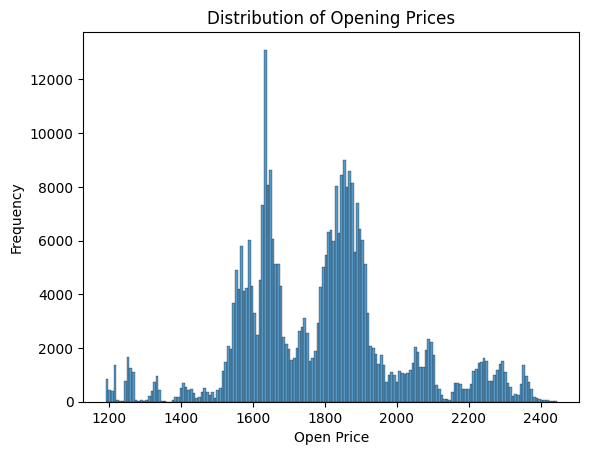

In [164]:
sns.histplot(data= df, x = 'Open')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

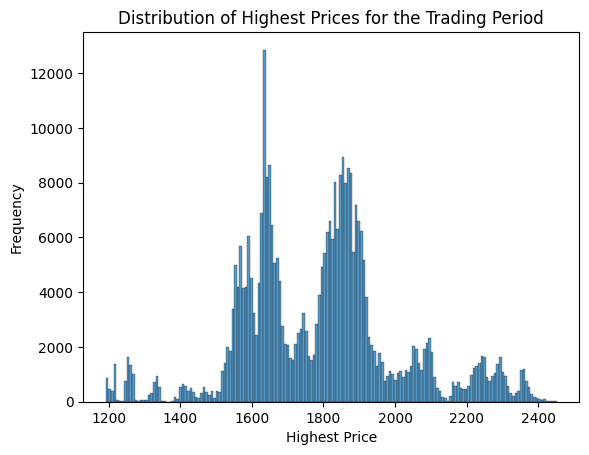

In [165]:
sns.histplot(data= df, x = 'High')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Prices for the Trading Period')
plt.show()

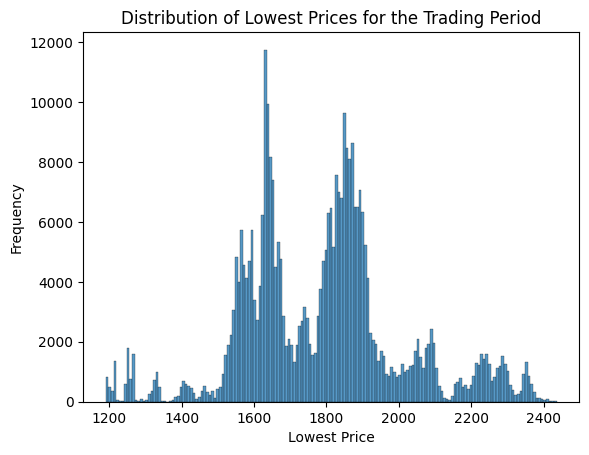

In [166]:
sns.histplot(data= df, x = 'Low')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Lowest Prices for the Trading Period')
plt.show()

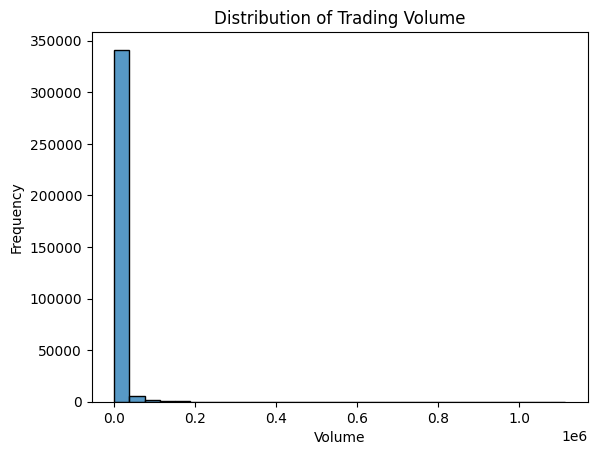

In [167]:
sns.histplot(data= df, x = 'Volume', bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

## Data Preprocessing

### More data preprocessing was done in a separate notebook `setup.ipynb`

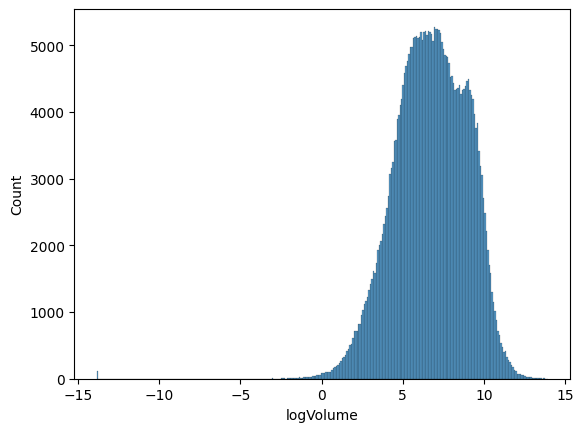

In [168]:
#applying a logarithmic transformation to volume column
df['logVolume'] = np.log(df['Volume'] + 0.000001)
df = df.drop(columns = ['Volume'])
sns.histplot(data=df, x = 'logVolume')
plt.show()


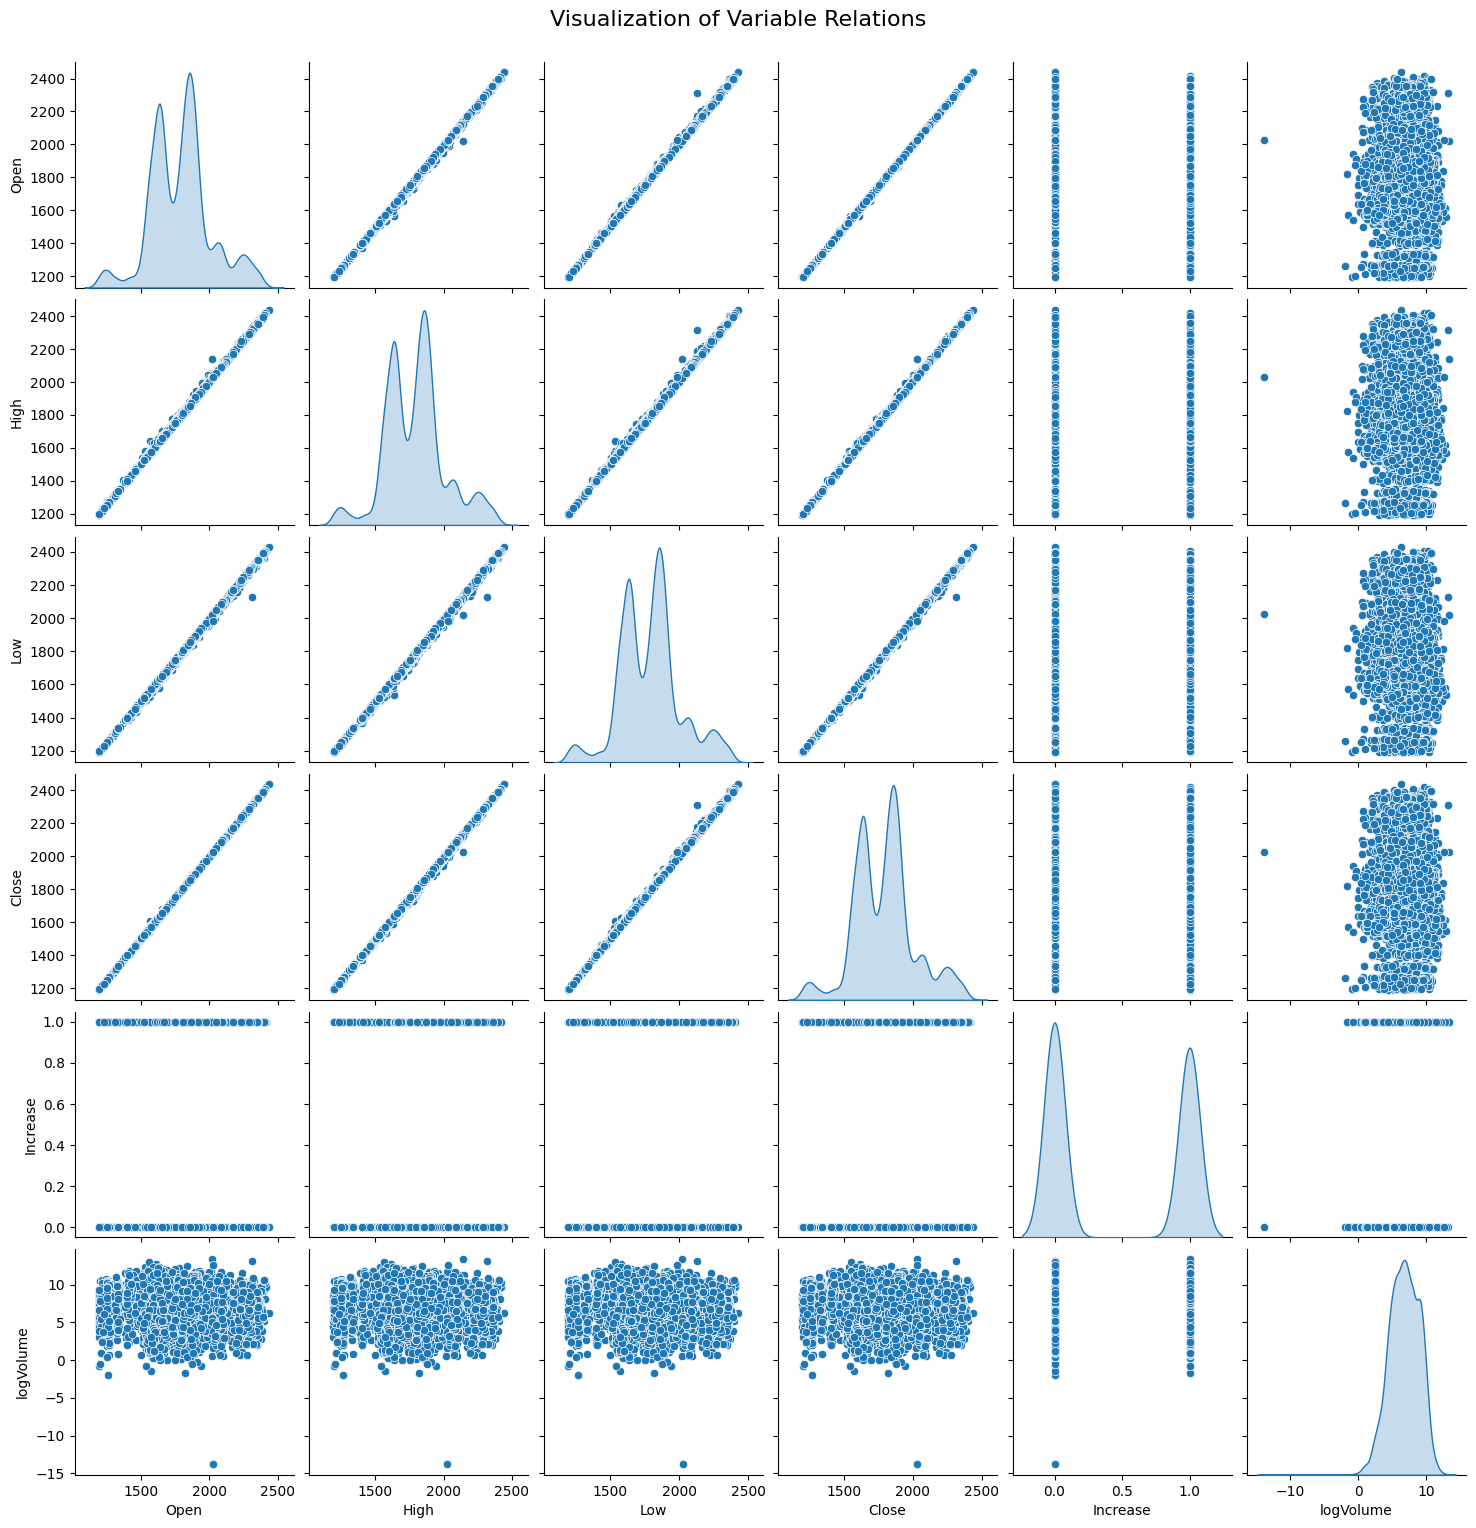

In [169]:
# pair plot visualization to explore the relationships between variables
df_sampled = df.sample(n=10000, random_state=1)
sns.pairplot(df_sampled.drop(columns=['Open time']), diag_kind='kde')
plt.suptitle('Visualization of Variable Relations', fontsize = 16, y=1.02)
plt.show()

Our pairplot shows that the only features that have good linear correlation with `Close` are `Open`, `High`, and `Low`. This makes sense because the closing price should not be too far off from these other prices.

In [170]:
# scales the numeric columns / normalize
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Open','High','Low','logVolume']
scaler = MinMaxScaler()
numeric_df = df.drop(columns = ['Close']).select_dtypes(include=[float, int])
scaled_data = scaler.fit_transform(numeric_df)
df[numeric_df.columns] = scaled_data

df

,Open time,Open,High,Low,Close,Increase,logVolume
0,2023-01-01 00:00:00,0.003897,0.003647,0.003908,1196.13,False,0.749928
1,2023-01-01 00:10:00,0.003298,0.003083,0.003435,1195.42,True,0.743750
2,2023-01-01 00:20:00,0.003777,0.003655,0.004767,1196.04,True,0.725856
3,2023-01-01 00:30:00,0.004288,0.003591,0.002159,1196.27,False,0.769407
4,2023-01-01 00:40:00,0.002372,0.002352,0.002399,1193.97,False,0.745711
...,...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,0.872067,0.867252,0.871607,2281.52,False,0.766281
349825,2023-12-31 23:20:00,0.867691,0.863550,0.870194,2276.67,False,0.731527
349826,2023-12-31 23:30:00,0.867652,0.864519,0.871936,2276.97,False,0.699506
349827,2023-12-31 23:40:00,0.869177,0.867562,0.874038,2279.83,True,0.703511


### Model 1: Linear Regression for `Close`

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Open', 'High', 'Low', 'logVolume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, train_pred)
test_error = mean_squared_error(y_test, test_pred)

print(f'train error: {train_error}')
print(f'test error: {test_error}')

train error: 1.1892465849157483
test error: 1.2272987736691447


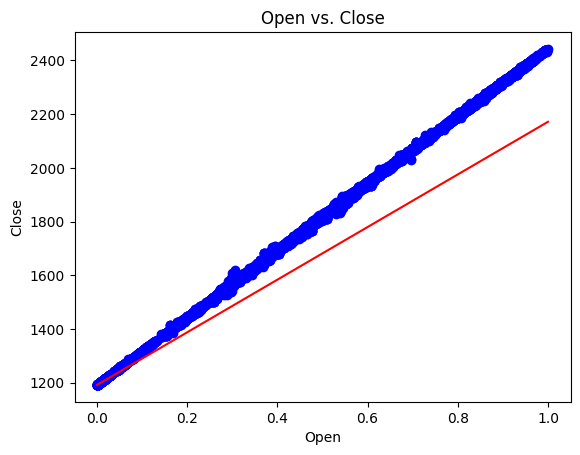

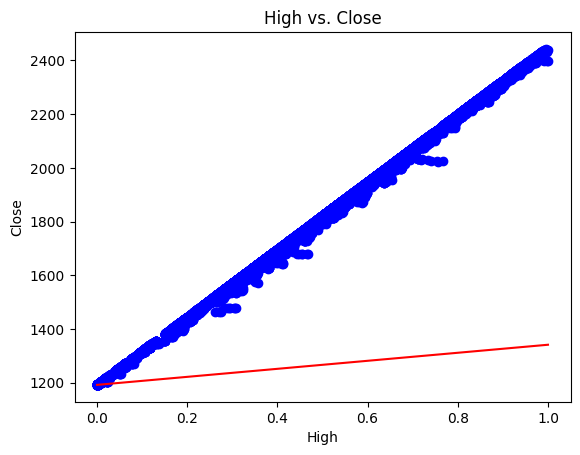

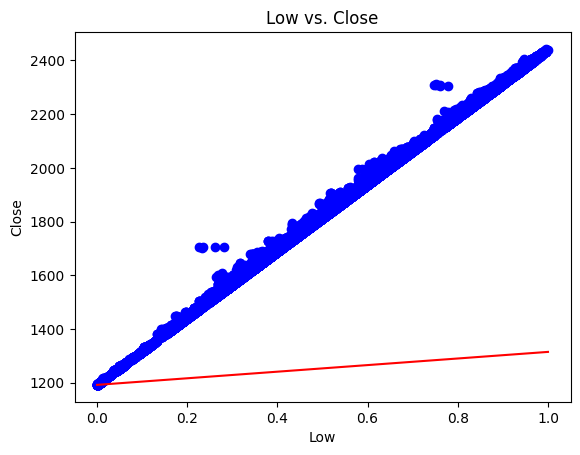

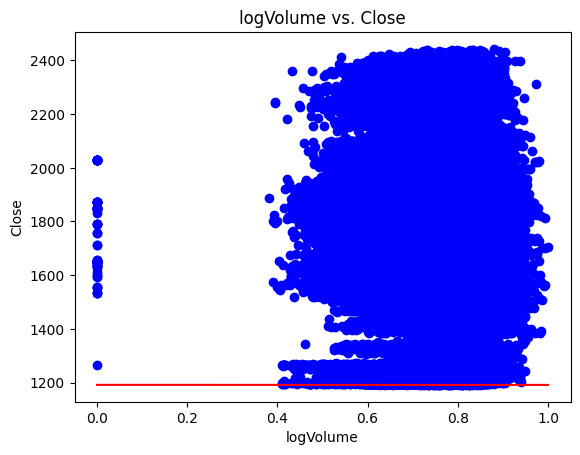

In [172]:
coefficients = model.coef_
intercept = model.intercept_

for i in range(len(X_train.columns)):
    col = X_train.columns[i]
    x_line = np.linspace(min(X_train[col]), max(X_train[col]), 100)  
    y_line = coefficients[i] * x_line + intercept  
    plt.plot(x_line, y_line, color='red', label='Regression Line')
    plt.scatter(X_train[col], y_train, color='blue', label='Data Points')
    plt.xlabel(col)
    plt.ylabel('Close')
    plt.title(f'{col} vs. Close')
    plt.show()

### Fitting Graph for Model 1

Degree 1: Train MSE = 1.1892, Test MSE = 1.2273
Degree 2: Train MSE = 1.1566, Test MSE = 1.1932
Degree 3: Train MSE = 1.1399, Test MSE = 1.1798
Degree 4: Train MSE = 1.1214, Test MSE = 1.1776
Degree 5: Train MSE = 1.0888, Test MSE = 1.3580


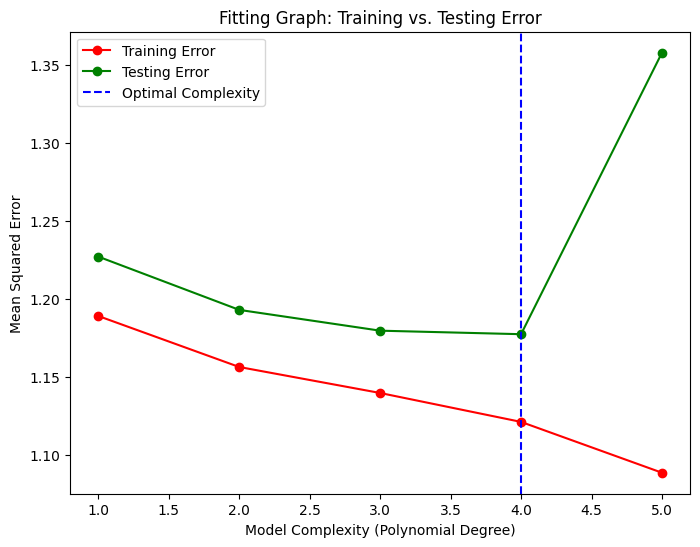

In [173]:
from sklearn.preprocessing import PolynomialFeatures
degrees = [1,2,3,4,5]
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    print(f'Degree {degree}: Train MSE = {train_errors[-1]:.4f}, Test MSE = {test_errors[-1]:.4f}')


plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='red')
plt.plot(degrees, test_errors, label='Testing Error', marker='o', color='green')
plt.axvline(x=np.argmin(test_errors) + 1, linestyle='--', color='blue', label='Optimal Complexity')

plt.title('Fitting Graph: Training vs. Testing Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Our first model seemed to perform fairly well with 1.2272987736691447 as out test MSE. It also seems to be fairly simple because our training error is only slightly lower than our testing error. However, we find that a polynomial regression model at degree 4 outperforms our original linear regression model without extremely overfitting to the training data.

We could further improve our regression model by exploring more complicated and compound features. We could investigate whether combining volume traded with other features will produce stronger features. In addition, we can explore other regression models such as Ridge or Lasso regression and use cross validation as our evaluation metric.

Another model we plan to use is a classification model. As we created the change in price column, we plan to classify them by negative or positive change, instead of predicting the closing value. This will allow us to learn more about our data, and give us insight about market behavior. This would also give us results that are easy to interpret. We may also try a decision trees model, as this would be very easy to interpret at each decision node and would be resistant to any outliers we may have. 


Our first model obtained a train MSE of 1.2272987736691447 and a test MSE of 1.1892465849157483. This means that our features 'Open', 'High', 'Low', and 'logVolume' performed well at predicting the target variable 'Close'. In order to improve our model, we may need to create new features and add them to our current features ('Open', 'High', 'Low', and 'logVolume') to see if they could provide additional information. We could also use k-fold validation in order to gain a robust model that takes into account all of the data.

### Model 2: Decision Tree Regressor for `Close`

In [174]:
X = df[['Open', 'High', 'Low', 'logVolume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Fine-tuned Model

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

param_dist = {
    'max_depth': [1, 2, 3, 5, 10, None], 
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20],  
}

regressor = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(
    regressor,
    param_distributions=param_dist,
    n_iter=10,  
    random_state=42,
    cv=5, 
    scoring='neg_mean_squared_error',  
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)

y_pred = random_search.predict(X_test)

print("Best Validation Score (MSE): ", -random_search.best_score_)

mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

best_model = random_search.best_estimator_
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Best Hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None}
Best Validation Score (MSE):  1.2592533902667056
Test MSE: 1.1819377246578888
Open: 0.9990905523782502
High: 9.717161505108781e-06
Low: 0.0008990013895222469
logVolume: 7.290707224047429e-07


In [176]:
from sklearn.metrics import mean_squared_error

y_train_pred = random_search.predict(X_train)

y_test_pred = random_search.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')

Training Mean Squared Error (MSE): 0.7219561798623114
Test Mean Squared Error (MSE): 1.1819377246578888


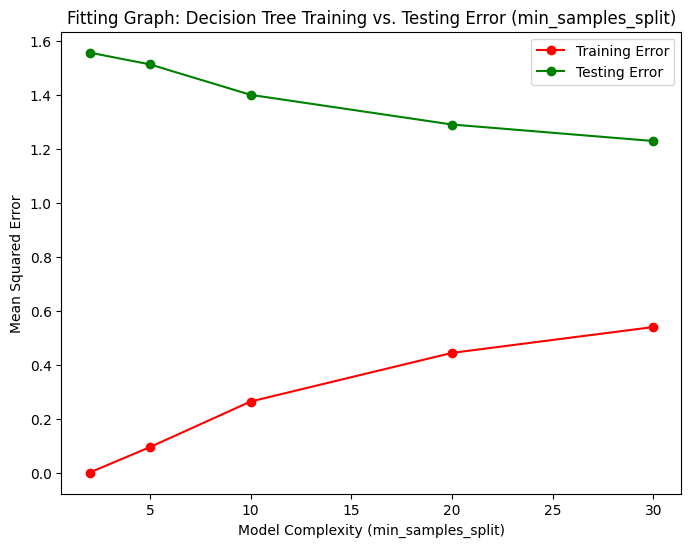

In [177]:
min_samples_splits = [2, 5, 10, 20, 30]
train_errors = []
test_errors = []

for min_samples in min_samples_splits:
    
    model = DecisionTreeRegressor(min_samples_split=min_samples, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the fitting graph
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_errors, label='Training Error', marker='o', color='red')
plt.plot(min_samples_splits, test_errors, label='Testing Error', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_split)')
plt.xlabel('Model Complexity (min_samples_split)')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.show()

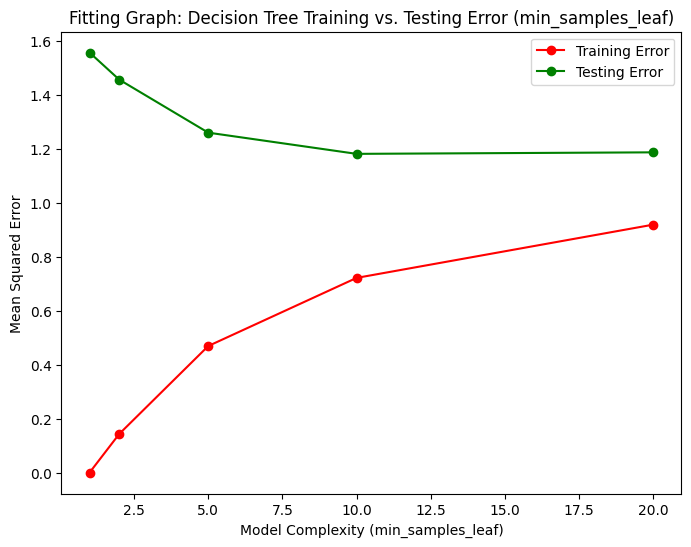

In [178]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

min_samples_leaves = [1, 2, 5, 10, 20] 
train_errors = []
test_errors = []

for min_samples in min_samples_leaves:
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, train_errors, label='Training Error', marker='o', color='red')
plt.plot(min_samples_leaves, test_errors, label='Testing Error', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_leaf)')
plt.xlabel('Model Complexity (min_samples_leaf)')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.show()

For both the parameters min sample leaf and min sample split, our model fits at the optimal value as we performed randomized search cv, allowing us to determine that the optimal value for both. Therefore, our model fits in the fitting graph at the lowest train and test mean squared error.


For our second model, the training MSE (0.7219) was a lot lower than the testing MSE (1.1819) which means that our model was overfiting to the training data. To improve this model, we could do feature selection and only include the most important features. The validation score from the cross-validation was 1.259 which was higher than the test MSE. This means that our model performed slightly better on the test data during the cross-validation. In our model, we tested the importance of each feature and the most important features were found to be 'Open' and 'Low' so we could try performing the model on only those two features to see if it will help with the overfitting. 

Evaluation of our model:

Our best model with a cross validation score of `1.2592533902667056` (MSE) scored a `1.1819377246578888` (MSE) on the test dataset.

### Model 3: Decision Tree Classifier for `Increase`

In [179]:
X = df[['Open', 'High', 'Low', 'logVolume']]
y = df['Increase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [1, 2, 3, 5, 10, None], 
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20],  
}

regressor = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    regressor,
    param_distributions=param_dist,
    n_iter=10,  
    random_state=42,
    cv=5, 
    scoring='accuracy',  
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)

y_pred = random_search.predict(X_test)

print("Best Validation Score (accuracy): ", random_search.best_score_)

accuracy = (y_pred == y_test).mean()
print(f'Test Accuracy: {accuracy}')

best_model = random_search.best_estimator_
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Best Hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None}
Best Validation Score (accuracy):  0.6273962349783737
Test Accuracy: 0.6362661864334105
Open: 0.3407228300856473
High: 0.2886495192918253
Low: 0.24257668766139026
logVolume: 0.12805096296113713


In [181]:
y_train_pred = best_model.predict(X_train)

y_test_pred = best_model.predict(X_test)

train_accuracy = (y_train_pred == y_train).mean()
test_accuracy = (y_test_pred == y_test).mean()

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.7942779145510482
Test Accuracy: 0.6362661864334105


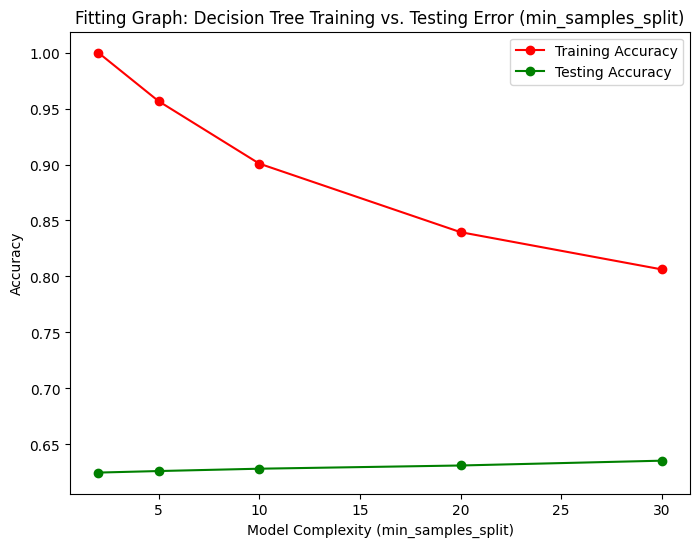

In [182]:
min_samples_splits = [2, 5, 10, 20, 30]
train_accuracies = []
test_accuracies = []

for min_samples in min_samples_splits:
    
    model = DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append((y_train_pred == y_train).mean())
    test_accuracies.append((y_test_pred == y_test).mean())

# Plot the fitting graph
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o', color='red')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_split)')
plt.xlabel('Model Complexity (min_samples_split)')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

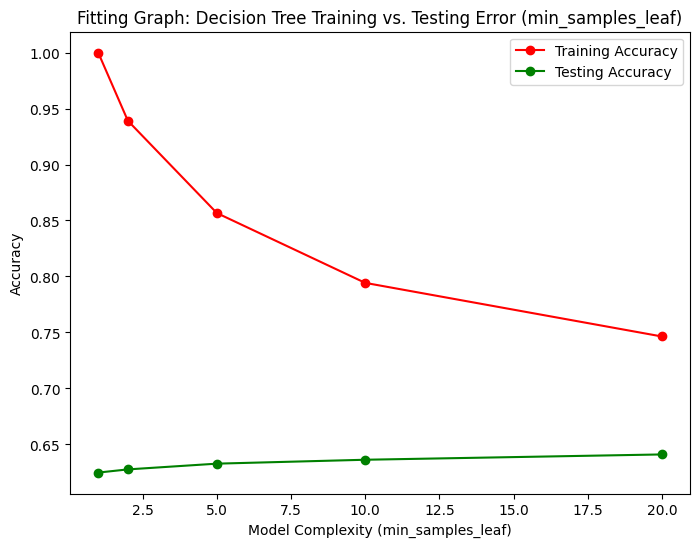

In [184]:
min_samples_leaves = [1, 2, 5, 10, 20]  
train_accuracies = []
test_accuracies = []

for min_samples in min_samples_leaves:
    
    model = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append((y_train_pred == y_train).mean())
    test_accuracies.append((y_test_pred == y_test).mean())

# Plot the fitting graph
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, train_accuracies, label='Training Accuracy', marker='o', color='red')
plt.plot(min_samples_leaves, test_accuracies, label='Testing Accuracy', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_leaf)')
plt.xlabel('Model Complexity (min_samples_leaf)')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Our third model tackles a classifcation problem predicting whether or not the price of Ethereum will increase given the open, high, low, and log volume of an interval. We used a decision tree classifier with grid search cross validation to optimize parameters and our best model performed pretty well with a train accuracy of 0.794, a test accuracy of 0.636, and a validation score of 0.627. This means our model is able to guess whether or not the price of Etheruem will increase within a given interval a majority of the time. 

We also plotted the fitting graphs for min_samples_split and min_samples_leaf to see where our best model lies. Despite our model having a larger gap between its train and test accuracies, it still maintains the best validation score.